In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import random
from numpy import arange 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.collections as collections
import matplotlib.gridspec as gridspec
import os
import csv
import scipy.misc
from scipy.stats import bernoulli
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2

In [6]:

log_path = 'data/driving_logV.csv'
img_path = 'data/IMG'
rolling_window = 3
amp_factor = 1.5
steering_offset = 0.1

data = pd.read_csv(log_path)

left = []
center = []
right = []
steering = data['steering']
steering = steering.astype(np.float32)

for i in range(len(data)):
    left.append(data['left'][i].split('IMG')[1])
    center.append(data['center'][i].split('IMG')[1])
    right.append(data['right'][i].split('IMG')[1])

data.head()

,center,left,right,steering,throttle,brake,speed
0,/Users/ingernoire/Desktop/books/IMG/center_201...,/Users/ingernoire/Desktop/books/IMG/left_2017_...,/Users/ingernoire/Desktop/books/IMG/right_2017...,0.0,0.0,0.0,0.000181
1,/Users/ingernoire/Desktop/books/IMG/center_201...,/Users/ingernoire/Desktop/books/IMG/left_2017_...,/Users/ingernoire/Desktop/books/IMG/right_2017...,0.0,0.0,0.0,0.000179
2,/Users/ingernoire/Desktop/books/IMG/center_201...,/Users/ingernoire/Desktop/books/IMG/left_2017_...,/Users/ingernoire/Desktop/books/IMG/right_2017...,0.0,0.0,0.0,0.000258
3,/Users/ingernoire/Desktop/books/IMG/center_201...,/Users/ingernoire/Desktop/books/IMG/left_2017_...,/Users/ingernoire/Desktop/books/IMG/right_2017...,0.0,0.0,0.0,0.000039
4,/Users/ingernoire/Desktop/books/IMG/center_201...,/Users/ingernoire/Desktop/books/IMG/left_2017_...,/Users/ingernoire/Desktop/books/IMG/right_2017...,0.0,0.0,0.0,0.000041


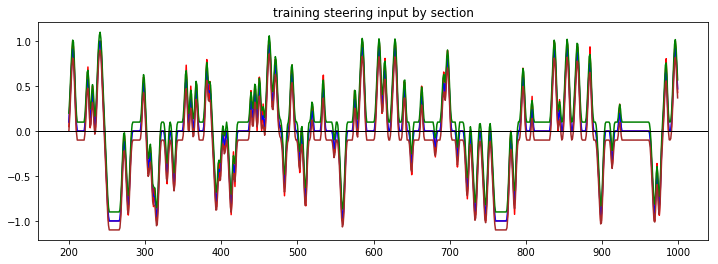

In [7]:
df = pd.DataFrame(steering)
smooth = df.rolling(rolling_window,center=True).mean()
smooth_l = df.rolling(rolling_window,center=True).mean()+steering_offset
smooth_r = df.rolling(rolling_window,center=True).mean()-steering_offset
t = np.arange(0.0, len(center), 1)[200:1000]

fig, ax = plt.subplots(figsize =(12,4))
ax.set_title('training steering input by section')
ax.plot(t, steering[200:1000], color='red')
ax.plot(t, smooth[200:1000], color='blue')
ax.plot(t, smooth_l[200:1000], color='green')
ax.plot(t, smooth_r[200:1000], color='brown')

ax.axhline(0, color='black', lw=1)
plt.show()

In [8]:
###Merge Left, Center and Right Camera image together...
X_all = np.concatenate((center[200:8000], left[200:8000], right[200:8000]), axis = 0)
y_all = np.concatenate((smooth[200:8000], smooth_l[200:8000], smooth_r[200:8000]), axis = 0)

In [9]:
###Shuffle all samples
X_all, y_all = shuffle(X_all, y_all)

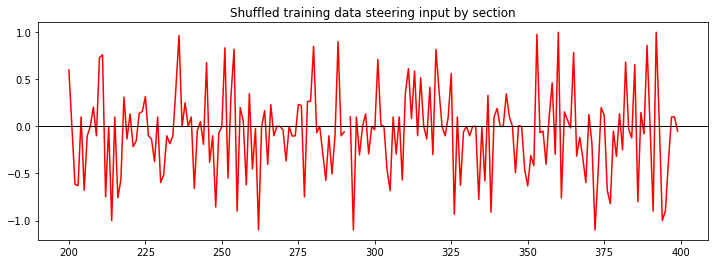

In [10]:
t = np.arange(0.0, len(y_all), 1)[200:400]

fig, ax = plt.subplots(figsize =(12,4))
ax.set_title('Shuffled training data steering input by section')
ax.plot(t, y_all[200:400], color='red')
ax.axhline(0, color='black', lw=1)


plt.show()